## Step 3: Data Loading & Exploration
In this step, we'll load the COVID-19 dataset, check its structure, and explore the columns and rows.


In [7]:
# Install missing packages
%pip install pandas matplotlib seaborn plotly

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


In [8]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('owid-covid-data.csv')

# Preview the first few rows
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [9]:
# Check the column names
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [10]:
# Check for missing values
df.isnull().sum()


iso_code                                        0
continent                                   14352
location                                        0
date                                            0
total_cases                                 35741
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative                292217
excess_mortality                           292217
excess_mortality_cumulative_per_million    292217
Length: 67, dtype: int64

In [11]:
# Filter data for a specific country (e.g., USA)
df_usa = df[df['location'] == 'USA']
df_usa.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


## Step 4: Data Cleaning
In this step, we clean the dataset by filtering for countries of interest, handling missing values, and ensuring the date column is in datetime format.


In [12]:
countries_of_interest = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)]


In [13]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])


C:\Users\LUMITI\AppData\Local\Temp\ipykernel_3168\4061761384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


In [14]:
df_filtered.dropna(subset=['total_cases', 'total_deaths'], inplace=True)


C:\Users\LUMITI\AppData\Local\Temp\ipykernel_3168\232981162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['total_cases', 'total_deaths'], inplace=True)


## Step 5: Exploratory Data Analysis (EDA)
In this step, we will perform exploratory data analysis to uncover trends and patterns in the data.


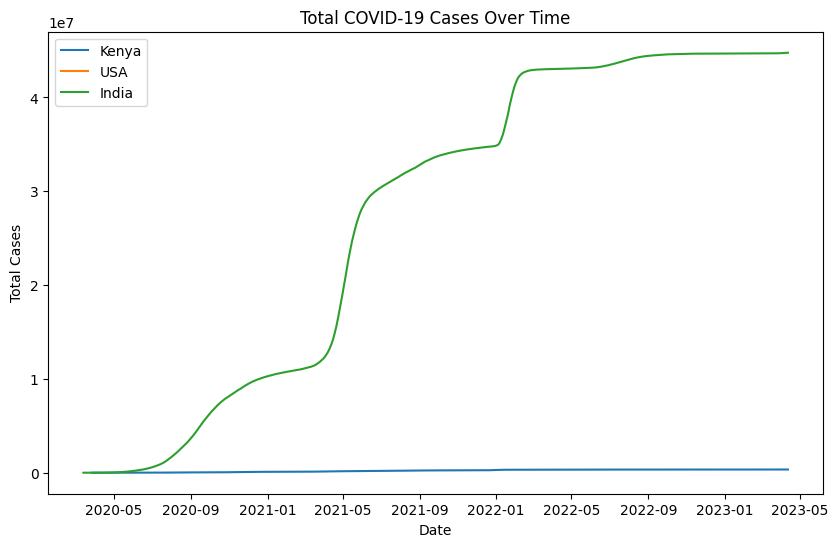

In [15]:
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


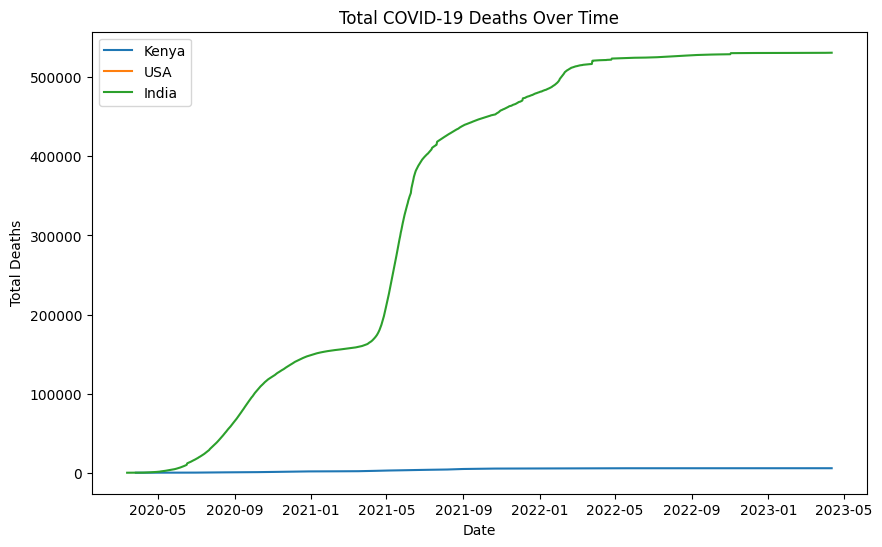

In [16]:
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


C:\Users\LUMITI\AppData\Local\Temp\ipykernel_3168\529879442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['new_cases'] = country_data['total_cases'].diff()


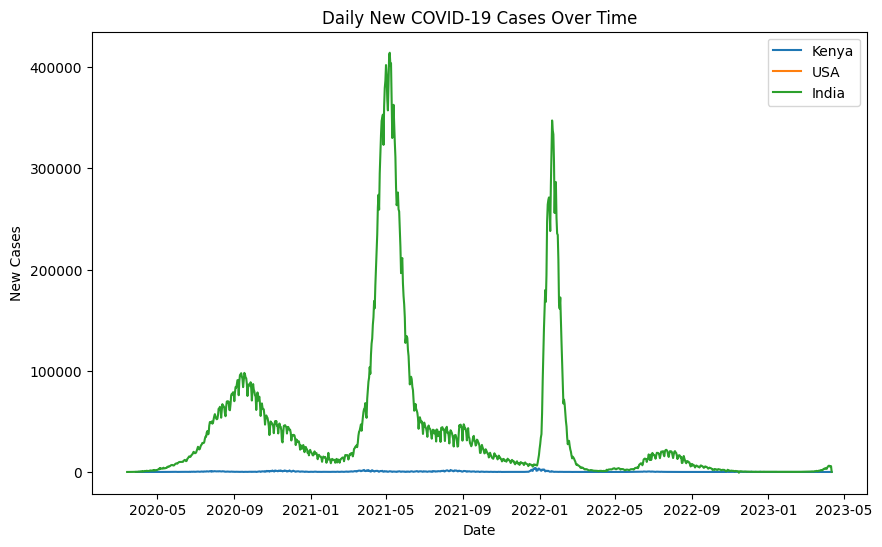

In [17]:
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    country_data['new_cases'] = country_data['total_cases'].diff()
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()


C:\Users\LUMITI\AppData\Local\Temp\ipykernel_3168\412692299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases'] * 100


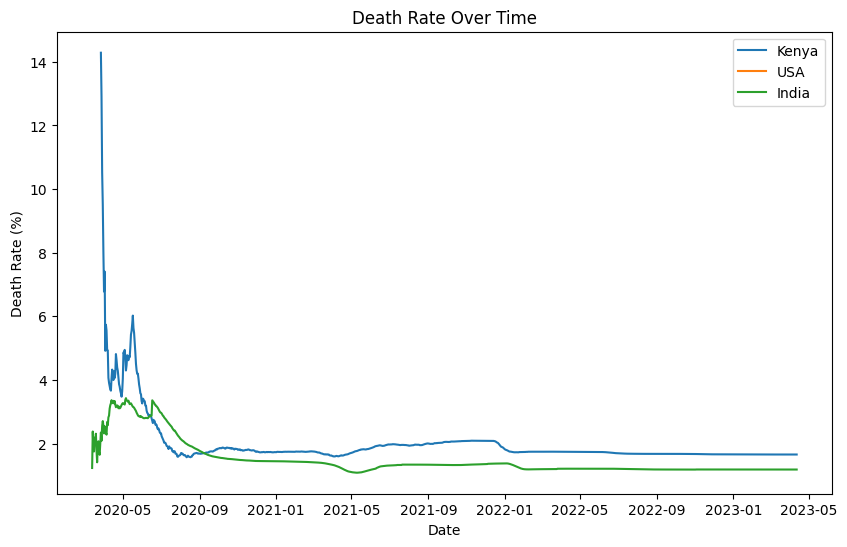

In [18]:
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases'] * 100
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title("Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (%)")
plt.legend()
plt.show()


## Step 6: Visualizing Vaccination Progress
In this step, we will analyze the vaccination rollout over time for the selected countries.


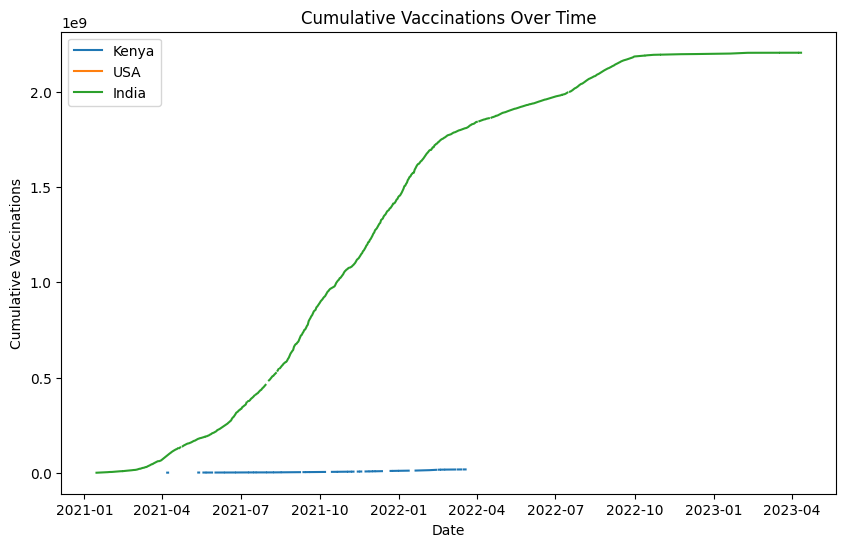

In [19]:
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Cumulative Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Vaccinations")
plt.legend()
plt.show()


C:\Users\LUMITI\AppData\Local\Temp\ipykernel_3168\3640535577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['vaccination_percentage'] = df_filtered['total_vaccinations'] / df_filtered['population'] * 100


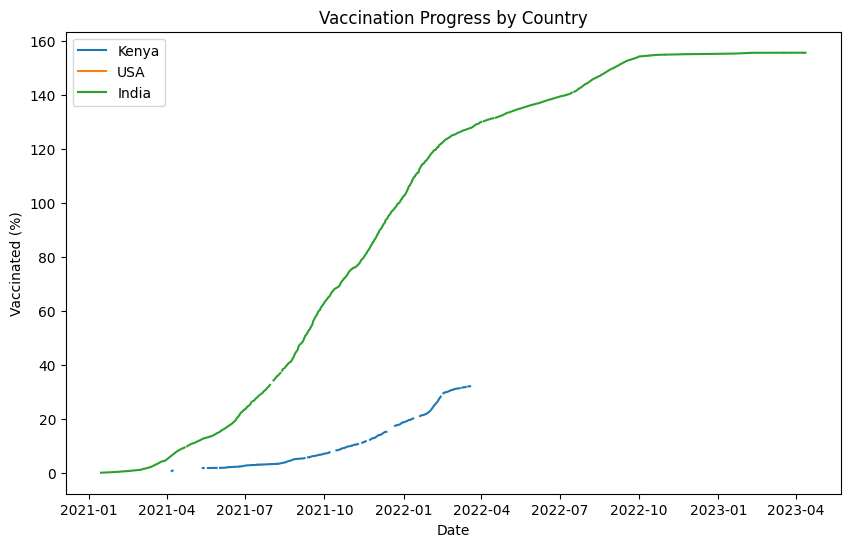

In [20]:
df_filtered['vaccination_percentage'] = df_filtered['total_vaccinations'] / df_filtered['population'] * 100
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['vaccination_percentage'], label=country)

plt.title("Vaccination Progress by Country")
plt.xlabel("Date")
plt.ylabel("Vaccinated (%)")
plt.legend()
plt.show()


## Step 7: Optional - Choropleth Map
In this optional step, we will create a choropleth map to visualize COVID-19 cases by country.


In [21]:
latest_data = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
fig = px.choropleth(latest_data, locations="iso_code", color="total_cases", hover_name="location", color_continuous_scale="Viridis")
fig.update_layout(title="COVID-19 Cases by Country")
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed